In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#cargar datos
location = "/Users/raul/Documents/Isaac/uteq/3ro/bd/evaluacion2/beisbol.csv"
datos = pd.read_csv(filepath_or_buffer= location)

In [3]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [4]:
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [5]:
datos.shape

(30, 4)

In [6]:
datos.dropna()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [7]:
X = datos['bateos'].values.reshape(-1,1)
y = datos['runs'].values.reshape(-1,1)

In [8]:
X

array([[5659],
       [5710],
       [5563],
       [5672],
       [5532],
       [5600],
       [5518],
       [5447],
       [5544],
       [5598],
       [5585],
       [5436],
       [5549],
       [5612],
       [5513],
       [5579],
       [5502],
       [5509],
       [5421],
       [5559],
       [5487],
       [5508],
       [5421],
       [5452],
       [5436],
       [5528],
       [5441],
       [5486],
       [5417],
       [5421]])

In [9]:
y

array([[855],
       [875],
       [787],
       [730],
       [762],
       [718],
       [867],
       [721],
       [735],
       [615],
       [708],
       [644],
       [654],
       [735],
       [667],
       [713],
       [654],
       [704],
       [731],
       [743],
       [619],
       [625],
       [610],
       [645],
       [707],
       [641],
       [624],
       [570],
       [593],
       [556]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [12]:
#Para obtener el intercepto:
print(modelo.intercept_)
#Para obtener la pendiente
print(modelo.coef_)

[-2837.77687486]
[[0.63897479]]


In [13]:
# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
print(len(y_test), len(y_pred))

6 6


In [14]:
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
datos2

,Actual,Predicted
0,787,716.839887
1,593,623.549568
2,735,748.149652
3,708,730.897333
4,624,638.884963
5,707,635.690089


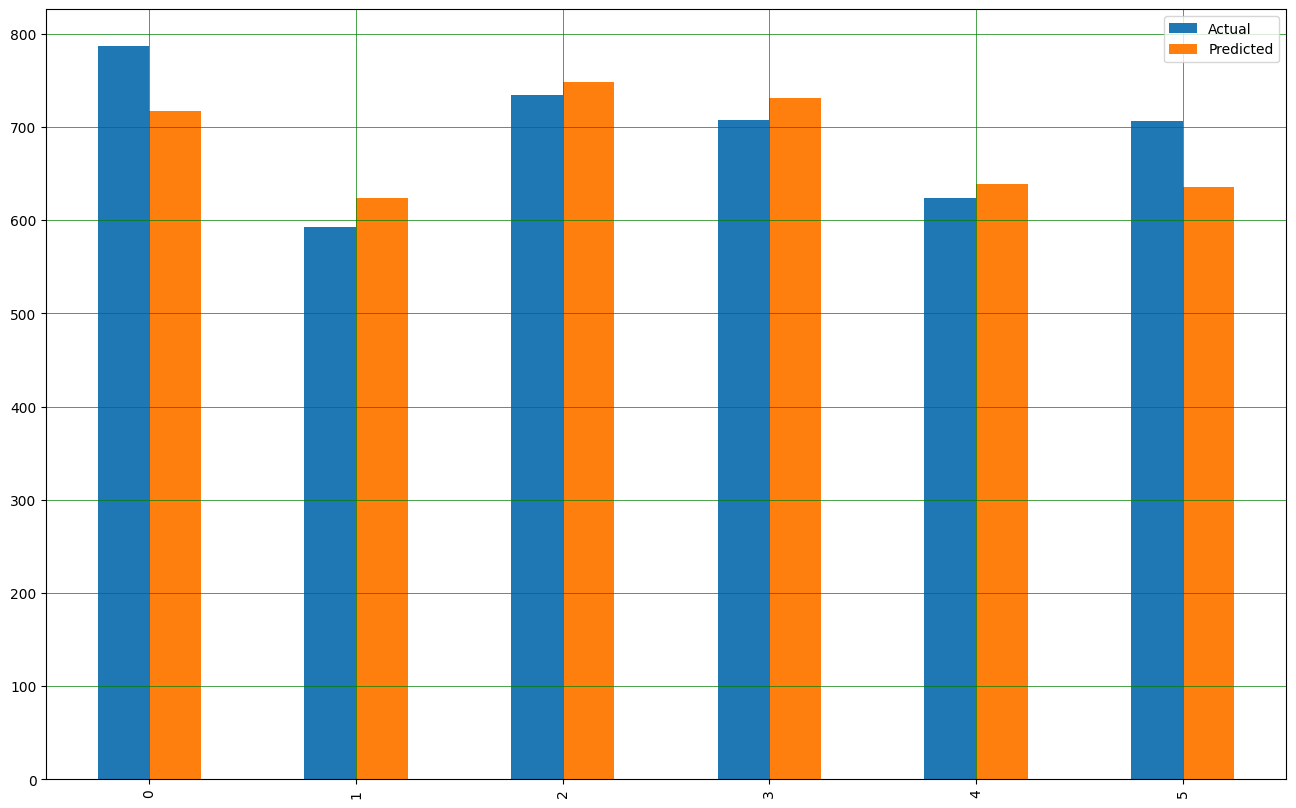

In [15]:
# Gráfica
datos2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

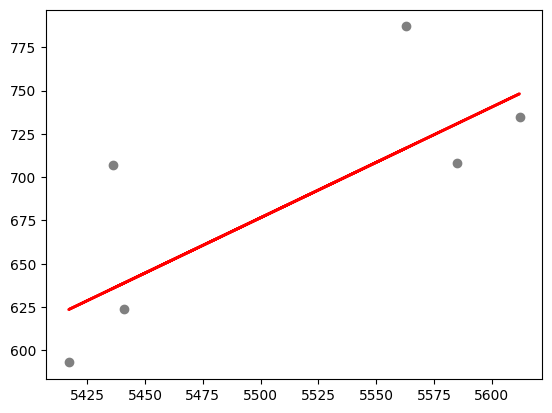

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
# Métricas de Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
recm = np.sqrt(mse)

In [18]:
# Imprimir métricas
print(f"Error Absoluto Medio: {mae}")
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Raíz del Error Cuadrático Medio (RECM): {recm}")

Error Absoluto Medio: 37.158589869587935
Error Cuadrático Medio: 1976.597374864583
Coeficiente de Determinación (R²): 0.5399576825420558
Raíz del Error Cuadrático Medio (RECM): 44.4589403254799


In [19]:
# definiendo la evaluación
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [20]:
# definiendo el espacio de busqueda
space = dict()
space['copy_X'] = [True, False]
space['positive'] = [True, False]
space['fit_intercept'] = [True, False]

In [21]:
# definiendo la búsqueda
search = GridSearchCV(modelo, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [22]:
# ejecutando la busqueda
result = search.fit(X, y)

In [23]:
# Resumen de resultados
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparametros: %s' % result.best_params_)

Mejor puntuación: -54.900772122374356
Mejores Hiperparametros: {'copy_X': True, 'fit_intercept': True, 'positive': True}


In [24]:
# Optimización del modelo
modelo = LinearRegression(fit_intercept=True, copy_X=True)
modelo.fit(X=X_train.reshape(-1, 1), y=y_train)

LinearRegression()

In [25]:
#Para obtener el intercepto:
print("Intercepto:",modelo.intercept_)
#Para obtener la pendiente
print("Coeficiente:",modelo.coef_)
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto: [-2837.77687486]
Coeficiente: [[0.63897479]]
Coeficiente de determinación R^2: 0.3721907914867524
